# Flow of Contents:

1. Data Extraction/ Cleaning of Predictor Variable (Escapes from Police Custody)
2. Data Visualisation for Predictor Variable
3. Data Extraction/ Cleaning of Response Variable (Rape Cases)
4. Exploratory Data Analysis (EDA)
5. Machine Learning Algorithm for Prediction 1 (Linear Regression)
6. Removal of outliers from dataset
7. Machine Learning Algorithm for Prediction 2 (Polynomial Regression)
8. Machine Learning Algorithm for Prediction 3 (K-Nearest Neighbours)
9. Conclusion

# Problem Statement:
## How likely is rape to be reported in India by State, based on various factors?

The factor we are delving into in this code segment is: 

No. of Escapes from Police Custody.


#### Predictor Variable: Escapes from Police Custody (Column T: EPC_Persons_Escaped_Total)

#### Response Variable: Rape cases per state (Column D: Rape)

In [1]:
# Basic Libraries
import numpy as np
import os
import pandas as pd
import seaborn as sb
import geopandas as gpd
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

# Data Extraction/ Cleaning for Predictor Variable (Escapes from Police Custody)

In [2]:
## Reading the file ##
data = pd.read_csv('41_Escapes_from_police_custody.csv')

In [3]:
# Sort DataFrame by 'Area_Name'
data = data.sort_values(by='Area_Name')
data

,Area_Name,Year,EPC_Cases_Cases_Acquitted,EPC_Cases_Cases_Convicted,EPC_Cases_Cases_Pending_for_Trial,EPC_Cases_Registered,EPC_Cases_Trial_Completed,EPC_Escapees_Re_Arrested_from_Lockup,EPC_Escapees_Re_Arrested_from_Others,EPC_FR_Submitted,...,EPC_Persons_Awarded_upto_3_Years_Imprisonment,EPC_Persons_Cases_Acquitted,EPC_Persons_Cases_Convicted,EPC_Persons_Cases_Pending_for_Trial,EPC_Persons_Chargesheeted_for_Escape,EPC_Persons_Escaped,EPC_Persons_Escaped_from_Lockup,EPC_Persons_Escaped_Outside_the_Lockup,EPC_Persons_Escaped_Total,EPC_Persons_Trial_Completed
249,Andaman & Nicobar Islands,2001,NaN,NaN,2.0,2.0,NaN,NaN,2.0,NaN,...,NaN,NaN,NaN,2.0,2.0,2.0,NaN,2.0,2.0,NaN
282,Andaman & Nicobar Islands,2007,NaN,NaN,3.0,3.0,NaN,4.0,NaN,0.0,...,NaN,NaN,NaN,4.0,4.0,4.0,4.0,0.0,4.0,0.0
299,Andaman & Nicobar Islands,2010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
287,Andaman & Nicobar Islands,2008,NaN,NaN,1.0,1.0,NaN,0.0,1.0,NaN,...,NaN,NaN,NaN,1.0,1.0,1.0,NaN,1.0,1.0,0.0
275,Andaman & Nicobar Islands,2006,NaN,NaN,5.0,5.0,NaN,5.0,1.0,0.0,...,NaN,NaN,NaN,6.0,5.0,6.0,5.0,1.0,6.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,West Bengal,2005,0.0,1.0,30.0,59.0,1.0,5.0,29.0,0.0,...,1.0,0.0,1.0,30.0,35.0,67.0,6.0,61.0,67.0,1.0
163,West Bengal,2010,1.0,1.0,3.0,32.0,2.0,0.0,5.0,9.0,...,1.0,1.0,1.0,3.0,5.0,38.0,3.0,35.0,38.0,2.0
169,West Bengal,2001,1.0,0.0,22.0,35.0,1.0,8.0,2.0,3.0,...,0.0,1.0,0.0,25.0,26.0,38.0,5.0,33.0,38.0,1.0
118,West Bengal,2007,1.0,2.0,15.0,31.0,3.0,2.0,22.0,10.0,...,2.0,1.0,2.0,12.0,18.0,35.0,5.0,30.0,35.0,3.0


In [4]:
# Filter data for years 2001 to 2010
data_filtered = data[data['Year'].between(2001, 2010)]

# Group by Area_Name and sum the values for each column
df_combined = data_filtered.groupby('Area_Name').sum().reset_index()

In [5]:
# Removing columns
selected_columns = ['Area_Name', 'EPC_Persons_Escaped_Total']
df_combined = df_combined[selected_columns]
df_combined

,Area_Name,EPC_Persons_Escaped_Total
0,Andaman & Nicobar Islands,13.0
1,Andhra Pradesh,1006.0
2,Arunachal Pradesh,101.0
3,Assam,520.0
4,Bihar,1150.0
5,Chandigarh,44.0
6,Chhattisgarh,351.0
7,Dadra & Nagar Haveli,4.0
8,Daman & Diu,2.0
9,Delhi,219.0


# Data Visualisation for Predictor Variable (Escapes from Police Custody)

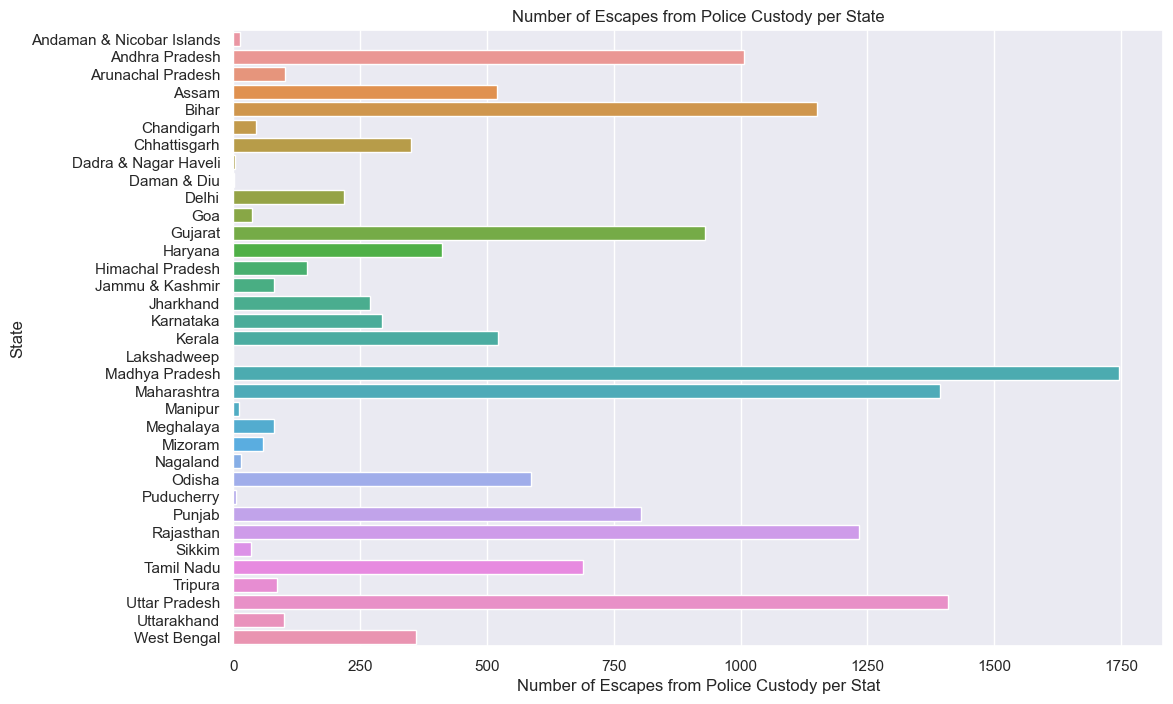

In [6]:
# Visualisation of No. of Rape cases per state
#grouped_data.sort_values(by='Rape', ascending=False, inplace=True)

# Plotting
plt.figure(figsize=(12, 8))
sb.barplot(x='EPC_Persons_Escaped_Total', y='Area_Name', data=df_combined)
plt.title('Number of Escapes from Police Custody per State')
plt.xlabel('Number of Escapes from Police Custody per Stat')
plt.ylabel('State')
plt.show()

# Data Extraction/ Cleaning for Response Variable (Rape Cases)

In [7]:
# Importing the response variable dataset
response_data = pd.read_csv('42_District_wise_crimes_committed_against_women_2001_2012.csv')

response_data_filtered = response_data[response_data['Year'] <= 2010]

# Converting it back to a CSV file
response_data_filtered.to_csv('42_District_wise_crimes_committed_against_women_2001_2010.csv', index=False)

# Converting it into a Pandas Dataframe
response_data_new = pd.read_csv('42_District_wise_crimes_committed_against_women_2001_2010.csv')
response_data_new = response_data_new[['STATE/UT', 'Year', 'Rape']]
#response_data_new

In [8]:
# Filter data for years 2001 to 2010
filtered_data = response_data_new[(response_data_new['Year'] >= 2001) & (response_data_new['Year'] <= 2010)]

# Group by 'STATE/UT' and sum up the 'Rape' column
grouped_data = filtered_data.groupby('STATE/UT')['Rape'].sum().reset_index()
grouped_data = grouped_data.iloc[1:]
grouped_data = grouped_data.reset_index(drop=True)

In [9]:
# Fixing State Name Discrepancies with density_df
grouped_data['STATE/UT'] = grouped_data['STATE/UT'].replace('D & N HAVELI', 'DADRA & NAGAR HAVELI')
grouped_data = grouped_data.rename(columns={'STATE/UT': 'Area_Name'})
grouped_data

,Area_Name,Rape
0,ANDHRA PRADESH,21392
1,ARUNACHAL PRADESH,824
2,ASSAM,25524
3,BIHAR,22526
4,CHANDIGARH,454
5,CHHATTISGARH,19502
6,DADRA & NAGAR HAVELI,98
7,DAMAN & DIU,28
8,DELHI,10292
9,GOA,532


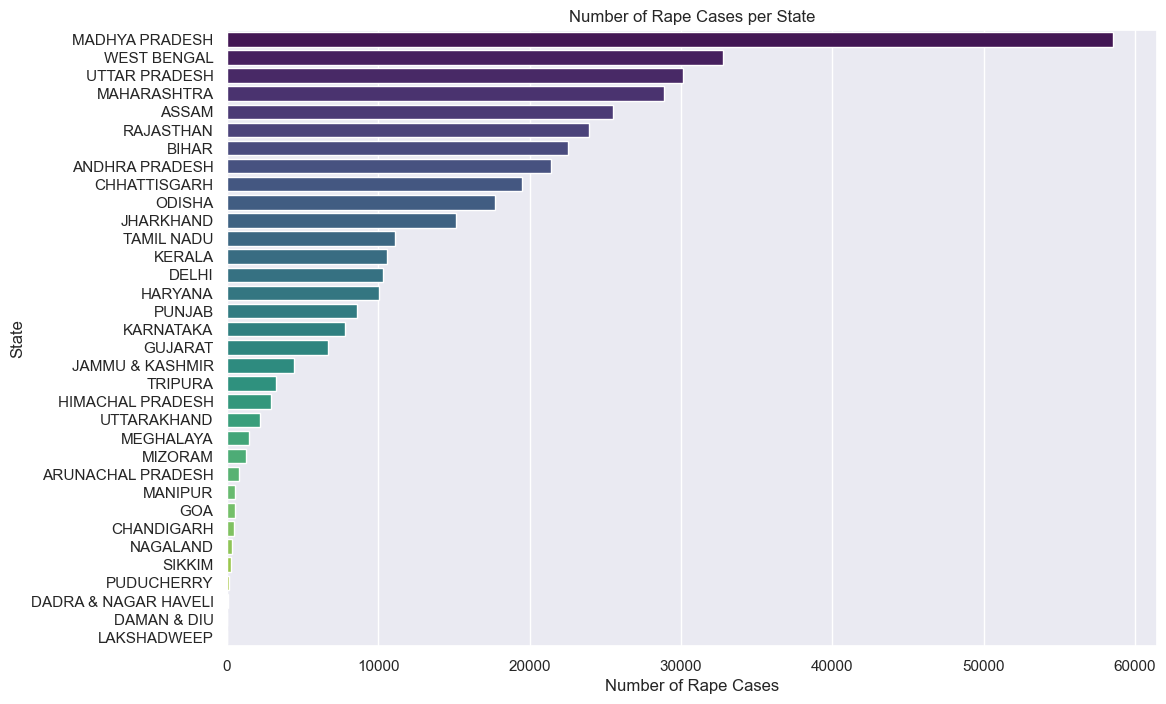

In [10]:
# Visualisation of No. of Rape cases per state
grouped_data.sort_values(by='Rape', ascending=False, inplace=True)

# Plotting
plt.figure(figsize=(12, 8))
sb.barplot(x='Rape', y='Area_Name', data=grouped_data, palette='viridis')
plt.title('Number of Rape Cases per State')
plt.xlabel('Number of Rape Cases')
plt.ylabel('State')
plt.show()

In [11]:
# Capitalising 'Area Name' column, so that we can merge it with rape cases by state
df_combined['Area_Name'] = df_combined['Area_Name'].str.upper()

# Merging both Response Variable & Predictor Variable Dataframes together into one
merged_df = pd.merge(df_combined, grouped_data, on='Area_Name')
merged_df

,Area_Name,EPC_Persons_Escaped_Total,Rape
0,ANDHRA PRADESH,1006.0,21392
1,ARUNACHAL PRADESH,101.0,824
2,ASSAM,520.0,25524
3,BIHAR,1150.0,22526
4,CHANDIGARH,44.0,454
5,CHHATTISGARH,351.0,19502
6,DADRA & NAGAR HAVELI,4.0,98
7,DAMAN & DIU,2.0,28
8,DELHI,219.0,10292
9,GOA,37.0,532


The above dataframe is the main dataframe we will work with for our Machine Learning Algorithms.

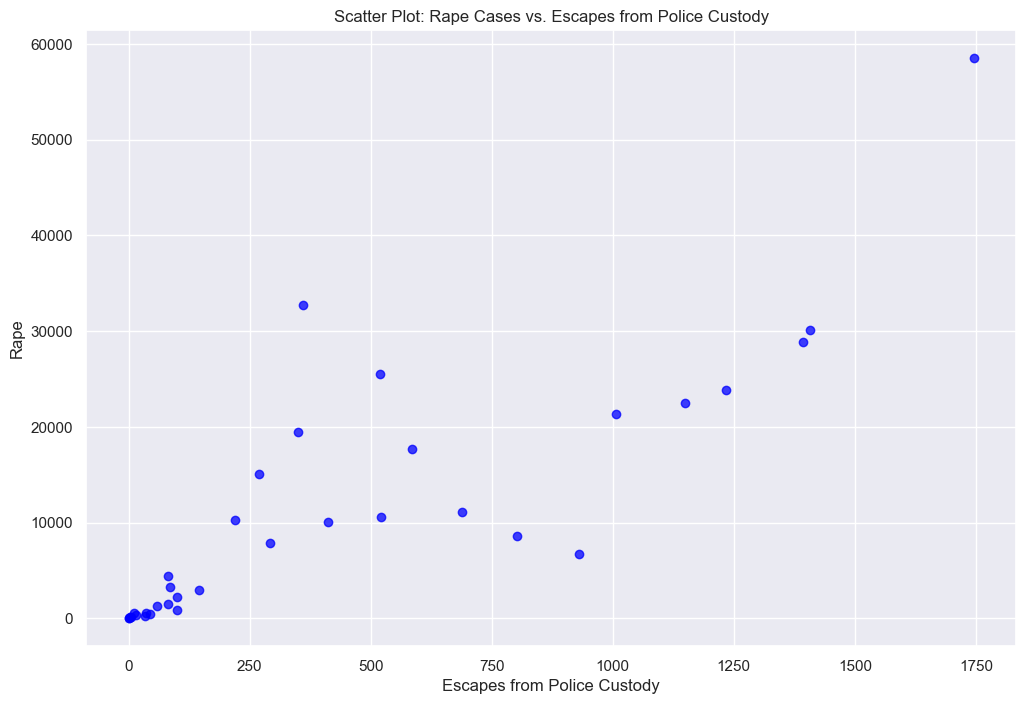

In [12]:
# Scatter plot of Rape against Relation of Rape Offenders to Victims
plt.figure(figsize=(12, 8))
plt.scatter(merged_df['EPC_Persons_Escaped_Total'], merged_df['Rape'], color='blue', alpha=0.75)
plt.title('Scatter Plot: Rape Cases vs. Escapes from Police Custody')
plt.xlabel('Escapes from Police Custody')
plt.ylabel('Rape')
plt.grid(True)
plt.show()

The above is a scatter plot, showing the visual relation between our Predictor and Response variables.

# Machine Learning Algorithms

### Correlation Coefficient between Response and Predictor Variables

Correlation coefficient = 1, indicates that the no. of Rape cases increases as escapes from police custody increases.

Correlation coefficient = -1, indicates that the no. of Rape cases decreases as escapes from police custody increases.

From this, we are able to get an indicator on the relation between escapes from police custody, and no. of rape cases reported.

Correlation Coefficient between Rape and Escape from Police Custody: 0.8371646996888269


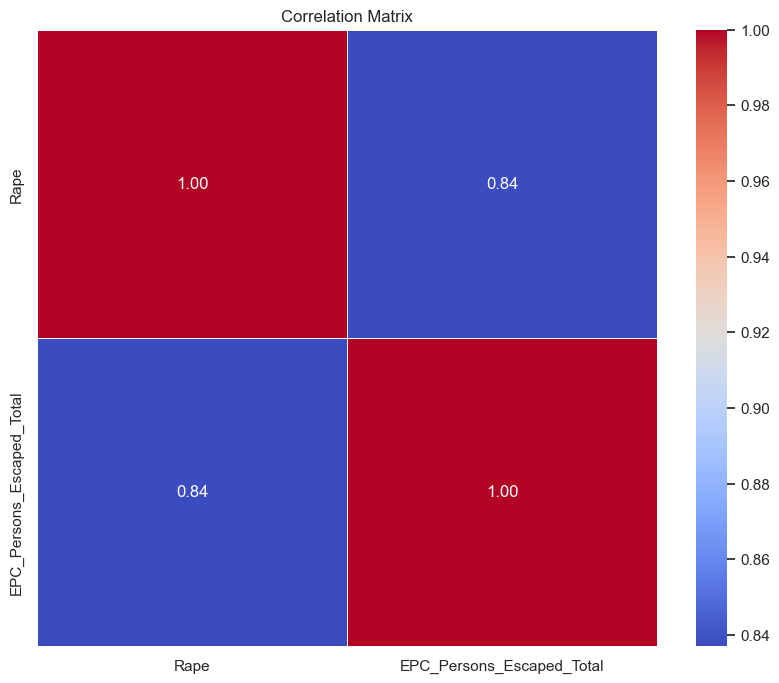

In [13]:
# Calculate correlation coefficient
correlation_coefficient = merged_df['Rape'].corr(merged_df['EPC_Persons_Escaped_Total'])

print("Correlation Coefficient between Rape and Escape from Police Custody:", correlation_coefficient)

# Calculate correlation matrix
corr_matrix = merged_df[['Rape', 'EPC_Persons_Escaped_Total']].corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sb.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

The above shows that the no. of rape cases is conversely related to the no. of escapes from police custody. This is a very strong relation, as it has a very high correlation coefficient of 0.84. 

### Linear Regression Method

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

Linear Regression on Train data

Intercept 	: =  1258.6291862459275
Coefficients 	: =  [24.49965427]
Mean Squared Error: 55715627.51
Root Mean Squared Error (RMSE): 7464.29
R^2 Explained Variance: 0.71


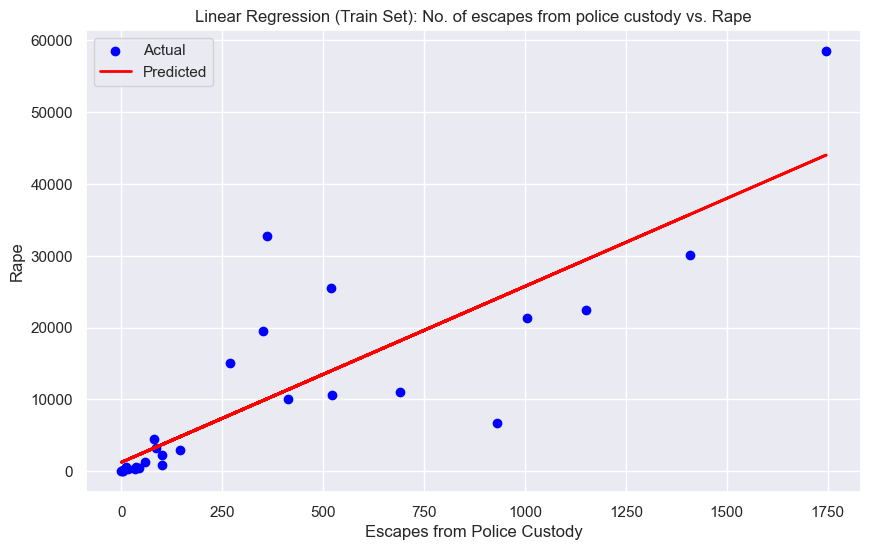

In [15]:
# Separate features (X) and target variable (y)
X = merged_df[['EPC_Persons_Escaped_Total']]
y = merged_df['Rape']

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
#scaler = StandardScaler()
#X_train_scaled = scaler.fit_transform(X_train)
#X_test_scaled = scaler.transform(X_test)

# Create and fit the linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Coefficients of the Linear Regression line
print('Intercept \t: = ', linear_model.intercept_)
print('Coefficients \t: = ', linear_model.coef_)

# Make predictions
y_pred = linear_model.predict(X_train)

# Evaluate the model
mse = mean_squared_error(y_train, y_pred)
rmse = np.sqrt(mse)  # Calculate RMSE
r2 = linear_model.score(X_train, y_train)
print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R^2 Explained Variance: {r2:.2f}")


# Plot the linear regression line
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, color='blue', label='Actual')
plt.plot(X_train, y_pred, color='red', linewidth=2, label='Predicted')

# Calculate the range of Concentration of Police Officers per km2
min_val = X_train.min()
max_val = X_train.max()

plt.title('Linear Regression (Train Set): No. of escapes from police custody vs. Rape')
plt.xlabel('Escapes from Police Custody')
plt.ylabel('Rape')
plt.legend()
plt.grid(True)
plt.show()

Linear Regression on Test Data

Intercept 	: =  2801.861039309202
Coefficients 	: =  [17.15664411]
Mean Squared Error: 16223671.32
Root Mean Squared Error (RMSE): 4027.86
R^2 Explained Variance: 0.80


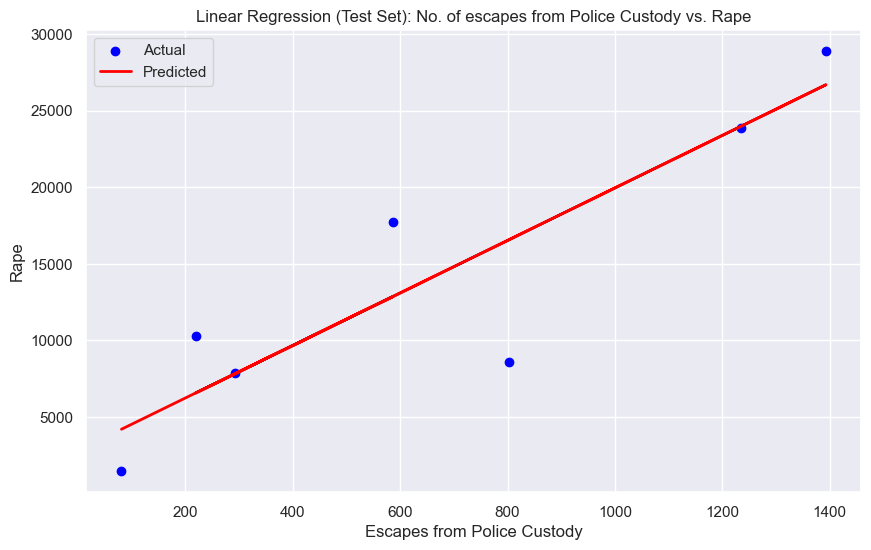

In [16]:
# Create and fit the linear regression model
linear_model = LinearRegression()
linear_model.fit(X_test, y_test)

# Coefficients of the Linear Regression line
print('Intercept \t: = ', linear_model.intercept_)
print('Coefficients \t: = ', linear_model.coef_)

# Make predictions
y_pred = linear_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Calculate RMSE
r2 = linear_model.score(X_test, y_test)
print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R^2 Explained Variance: {r2:.2f}")


# Plot the linear regression line
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted')

# Calculate the range of Concentration of Police Officers per km2
min_val = X_test.min()
max_val = X_test.max()

plt.title('Linear Regression (Test Set): No. of escapes from Police Custody vs. Rape')
plt.xlabel('Escapes from Police Custody')
plt.ylabel('Rape')
plt.legend()
plt.grid(True)
plt.show()

As we can see, the R-squared explained variance we have obtained from linear regression for both the Train (0.71) & Test (0.80) sets are quite high. However, as seen from the plot, there are a few outliers. We can remove them to see if R-squared explained variance increases.

### Removal of Outliers

#### Using Z-Score method to remove outliers from Dataframe

In [17]:
from scipy import stats

cutdown_df = merged_df[['Area_Name', 'Rape', 'EPC_Persons_Escaped_Total']]

In [32]:
# Calculate Z-scores for 'Rape' and 'Concentration of Police Officers per km2' columns
z_scores = stats.zscore(cutdown_df[['Rape', 'EPC_Persons_Escaped_Total']])

# Define threshold for outliers (e.g., Z-score > 3 or Z-score < -3)
threshold = 3

# Filter rows based on Z-scores to remove outliers
filtered_df = cutdown_df[(z_scores < threshold).all(axis=1)]

# Dataframe with outliers removed
print("\nDataFrame after removing outliers:")
filtered_df


DataFrame after removing outliers:


,Area_Name,Rape,EPC_Persons_Escaped_Total
0,ANDHRA PRADESH,21392,1006.0
1,ARUNACHAL PRADESH,824,101.0
2,ASSAM,25524,520.0
3,BIHAR,22526,1150.0
4,CHANDIGARH,454,44.0
5,CHHATTISGARH,19502,351.0
6,DADRA & NAGAR HAVELI,98,4.0
7,DAMAN & DIU,28,2.0
8,DELHI,10292,219.0
9,GOA,532,37.0


### Linear Regression on dataframe with outliers removed (Z-Score Method)

Intercept 	: =  2860.1531328692854
Coefficients 	: =  [18.23804093]
Mean Squared Error: 48638524.75
Root Mean Squared Error (RMSE): 6974.13
R^2 Explained Variance: 0.57


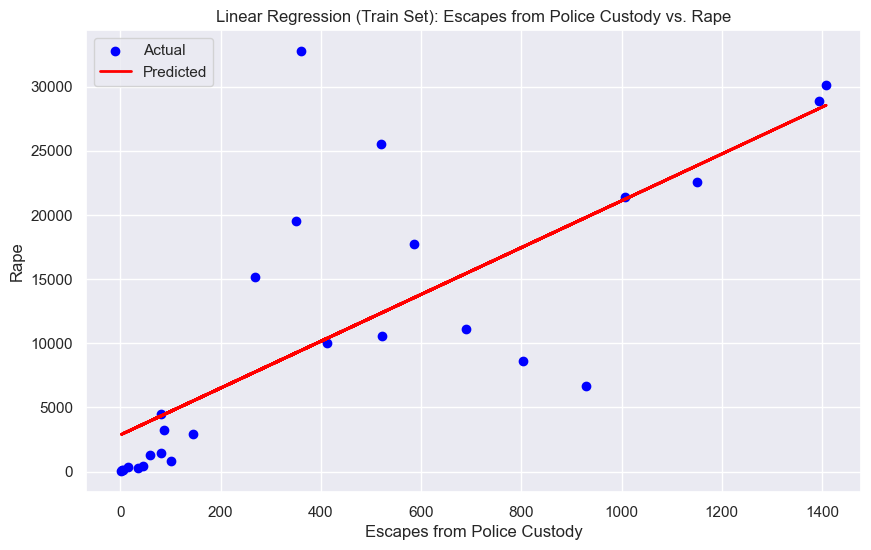

In [33]:
# Separate features (X) and target variable (y)
X = filtered_df[['EPC_Persons_Escaped_Total']]
y = filtered_df['Rape']

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
#scaler = StandardScaler()
#X_train_scaled = scaler.fit_transform(X_train)
#X_test_scaled = scaler.transform(X_test)

# Create and fit the linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Coefficients of the Linear Regression line
print('Intercept \t: = ', linear_model.intercept_)
print('Coefficients \t: = ', linear_model.coef_)

# Make predictions
y_pred = linear_model.predict(X_train)

# Evaluate the model
mse = mean_squared_error(y_train, y_pred)
rmse = np.sqrt(mse)  # Calculate RMSE
r2 = linear_model.score(X_train, y_train)
print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R^2 Explained Variance: {r2:.2f}")


# Plot the linear regression line
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, color='blue', label='Actual')
plt.plot(X_train, y_pred, color='red', linewidth=2, label='Predicted')

# Calculate the range of Escapes from Police Custody
min_val = X_train.min()
max_val = X_train.max()

plt.title('Linear Regression (Train Set): Escapes from Police Custody vs. Rape')
plt.xlabel('Escapes from Police Custody')
plt.ylabel('Rape')
plt.legend()
plt.grid(True)
plt.show()

After using the Z-Score method to remove outliers, we achieve a lower explained variance value of 0.57 on the train set, as compared to 0.71 before the removal of outliers.

We try to use other methods to remove outliers, to see if it achieves a better outcome on explained variance.

#### Using IQR (Inter-Quartile Range) method to remove outliers from Dataframe

In [20]:
# Calculate the IQR for 'Rape' and 'Concentration of Police Officers per km2'
Q1_rape = merged_df['Rape'].quantile(0.25)
Q3_rape = merged_df['Rape'].quantile(0.75)
IQR_rape = Q3_rape - Q1_rape

Q1_cop = merged_df['EPC_Persons_Escaped_Total'].quantile(0.25)
Q3_cop = merged_df['EPC_Persons_Escaped_Total'].quantile(0.75)
IQR_cop = Q3_cop - Q1_cop

# Define outlier boundaries
lower_bound_rape = Q1_rape - 1.5 * IQR_rape
upper_bound_rape = Q3_rape + 1.5 * IQR_rape

lower_bound_cop = Q1_cop - 1.5 * IQR_cop
upper_bound_cop = Q3_cop + 1.5 * IQR_cop

# Filter DataFrame to remove outliers
filtered_df2 = merged_df[
    (merged_df['Rape'] >= lower_bound_rape) & (filtered_df['Rape'] <= upper_bound_rape) &
    (merged_df['EPC_Persons_Escaped_Total'] >= lower_bound_cop) &
    (merged_df['EPC_Persons_Escaped_Total'] <= upper_bound_cop)
]

print("\nDataFrame after removing outliers:")
filtered_df2


DataFrame after removing outliers:


,Area_Name,EPC_Persons_Escaped_Total,Rape
0,ANDHRA PRADESH,1006.0,21392
1,ARUNACHAL PRADESH,101.0,824
2,ASSAM,520.0,25524
3,BIHAR,1150.0,22526
4,CHANDIGARH,44.0,454
5,CHHATTISGARH,351.0,19502
6,DADRA & NAGAR HAVELI,4.0,98
7,DAMAN & DIU,2.0,28
8,DELHI,219.0,10292
9,GOA,37.0,532


### Linear Regression on dataframe with outliers removed (IQR Method)

Intercept 	: =  2860.1531328692854
Coefficients 	: =  [18.23804093]
Mean Squared Error: 48638524.75
Root Mean Squared Error (RMSE): 6974.13
R^2 Explained Variance: 0.57


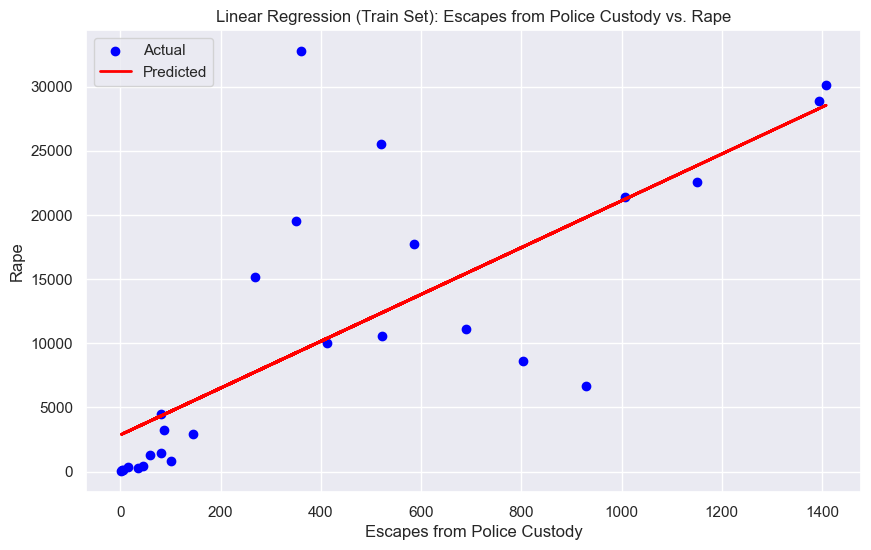

In [21]:
# Separate features (X) and target variable (y)
X = filtered_df2[['EPC_Persons_Escaped_Total']]
y = filtered_df2['Rape']

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
#scaler = StandardScaler()
#X_train_scaled = scaler.fit_transform(X_train)
#X_test_scaled = scaler.transform(X_test)

# Create and fit the linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Coefficients of the Linear Regression line
print('Intercept \t: = ', linear_model.intercept_)
print('Coefficients \t: = ', linear_model.coef_)

# Make predictions
y_pred = linear_model.predict(X_train)

# Evaluate the model
mse = mean_squared_error(y_train, y_pred)
rmse = np.sqrt(mse)  # Calculate RMSE
r2 = linear_model.score(X_train, y_train)
print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R^2 Explained Variance: {r2:.2f}")


# Plot the linear regression line
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, color='blue', label='Actual')
plt.plot(X_train, y_pred, color='red', linewidth=2, label='Predicted')

# Calculate the range of Concentration of Police Officers per km2
min_val = X_train.min()
max_val = X_train.max()

plt.title('Linear Regression (Train Set): Escapes from Police Custody vs. Rape')
plt.xlabel('Escapes from Police Custody')
plt.ylabel('Rape')
plt.legend()
plt.grid(True)
plt.show()

Using the IQR method to remove outliers, we unfortunately achieve a the same algorithm for prediction, with our explained variance remaining the same (0.57) on the train set.

In conclusion, the best method is not to remove any outliers if we were to use Linear Regression Method.

## Using Polynomial Regression

In [34]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

#### Using degree 2 polynomial regression

Intercept 	: =  1363.7511261519558
Coefficients 	: =  [ 0.00000000e+00  2.99408532e+01 -9.34667491e-03]
Mean Squared Error (Train Set): 46023260.70
Root Mean Squared Error (RMSE): 6784.04
R^2 Explained Variance (Train Set): 0.59


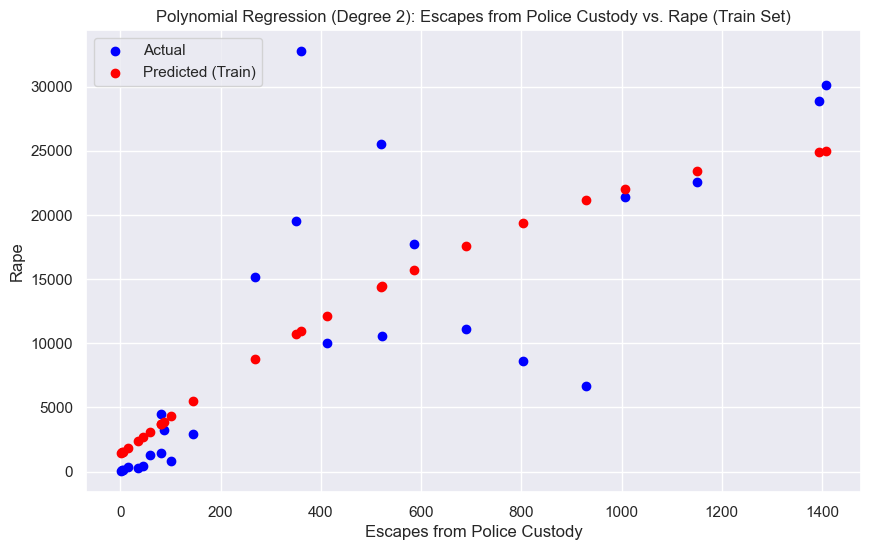

In [35]:
# Separate features (X) and target variable (y)
X = filtered_df[['EPC_Persons_Escaped_Total']]
y = filtered_df['Rape']

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Polynomial features transformation
degree = 2  # Define the degree of polynomial features
poly_features = PolynomialFeatures(degree=degree)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

# Create and fit the polynomial regression model
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

# Coefficients of the Polynomial Regression line
print('Intercept \t: = ', poly_model.intercept_)
print('Coefficients \t: = ', poly_model.coef_)

# Make predictions
y_train_pred = poly_model.predict(X_train_poly)

# Evaluate the model
mse = mean_squared_error(y_train, y_train_pred)
rmse = np.sqrt(mse)  # Calculate RMSE
r2 = poly_model.score(X_train_poly, y_train)
print(f"Mean Squared Error (Train Set): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R^2 Explained Variance (Train Set): {r2:.2f}")

# Plot the polynomial regression line
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, color='blue', label='Actual')
plt.scatter(X_train, y_train_pred, color='red', label='Predicted (Train)')
plt.title(f'Polynomial Regression (Degree {degree}): Escapes from Police Custody vs. Rape (Train Set)')
plt.xlabel('Escapes from Police Custody')
plt.ylabel('Rape')
plt.legend()
plt.grid(True)
plt.show()

#### Using degree 3 polynomial regression

Intercept 	: =  -2647.740742003225
Coefficients 	: =  [ 0.00000000e+00  9.87517056e+01 -1.53603516e-01  7.14937175e-05]
Mean Squared Error (Train Set): 28404338.81
Root Mean Squared Error (RMSE): 5329.57
R^2 Explained Variance (Train Set): 0.75


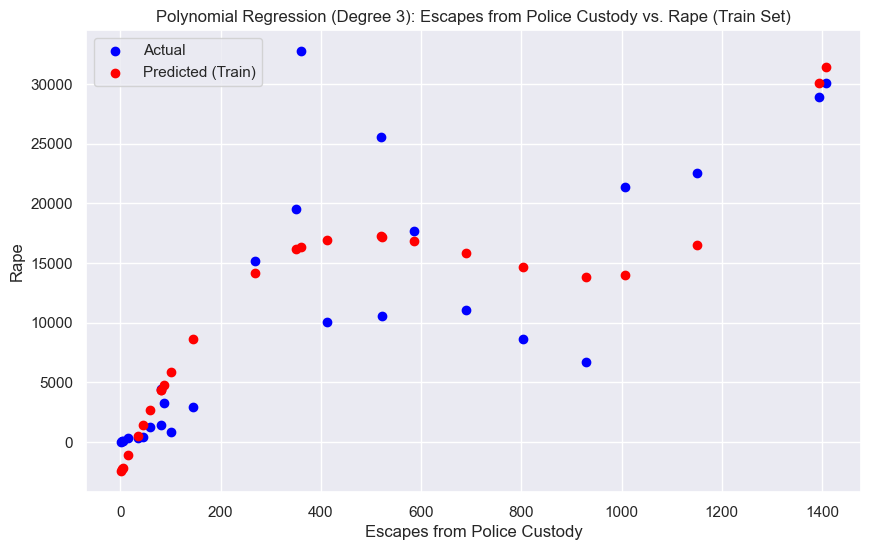

In [36]:
# Separate features (X) and target variable (y)
X = filtered_df[['EPC_Persons_Escaped_Total']]
y = filtered_df['Rape']

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Polynomial features transformation
degree = 3  # Define the degree of polynomial features
poly_features = PolynomialFeatures(degree=degree)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

# Create and fit the polynomial regression model
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

# Coefficients of the Polynomial Regression line
print('Intercept \t: = ', poly_model.intercept_)
print('Coefficients \t: = ', poly_model.coef_)

# Make predictions
y_train_pred = poly_model.predict(X_train_poly)

# Evaluate the model
mse = mean_squared_error(y_train, y_train_pred)
rmse = np.sqrt(mse)  # Calculate RMSE
r2 = poly_model.score(X_train_poly, y_train)
print(f"Mean Squared Error (Train Set): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R^2 Explained Variance (Train Set): {r2:.2f}")

# Plot the polynomial regression line
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, color='blue', label='Actual')
plt.scatter(X_train, y_train_pred, color='red', label='Predicted (Train)')
plt.title(f'Polynomial Regression (Degree {degree}): Escapes from Police Custody vs. Rape (Train Set)')
plt.xlabel('Escapes from Police Custody')
plt.ylabel('Rape')
plt.legend()
plt.grid(True)
plt.show()

#### Using degree 4 polynomial regression

Intercept 	: =  -3550.7370022353534
Coefficients 	: =  [ 0.00000000e+00  1.23380020e+02 -2.46570127e-01  1.81569768e-04
 -4.00557091e-08]
Mean Squared Error (Train Set): 27852543.04
Root Mean Squared Error (RMSE): 5277.55
R^2 Explained Variance (Train Set): 0.75


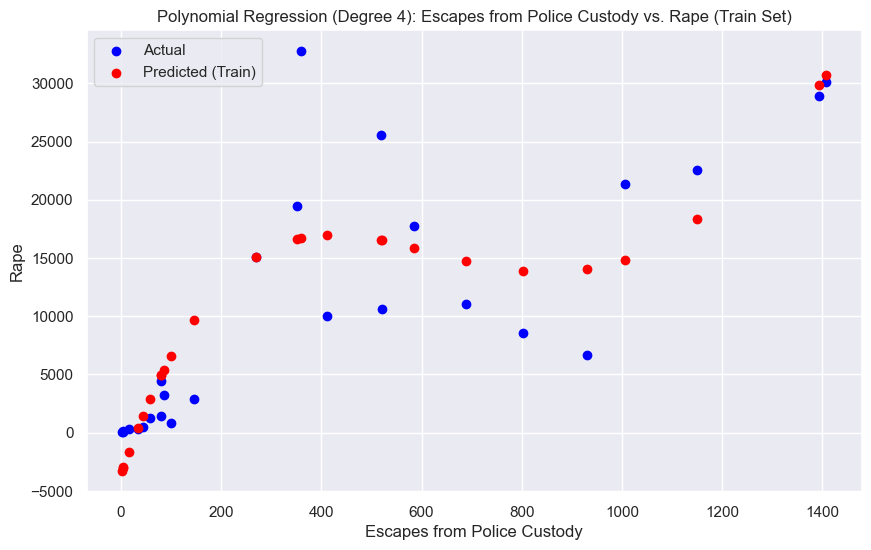

In [37]:
# Separate features (X) and target variable (y)
X = filtered_df[['EPC_Persons_Escaped_Total']]
y = filtered_df['Rape']

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Polynomial features transformation
degree = 4  # Define the degree of polynomial features
poly_features = PolynomialFeatures(degree=degree)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

# Create and fit the polynomial regression model
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

# Coefficients of the Polynomial Regression line
print('Intercept \t: = ', poly_model.intercept_)
print('Coefficients \t: = ', poly_model.coef_)

# Make predictions
y_train_pred = poly_model.predict(X_train_poly)

# Evaluate the model
mse = mean_squared_error(y_train, y_train_pred)
rmse = np.sqrt(mse)  # Calculate RMSE
r2 = poly_model.score(X_train_poly, y_train)
print(f"Mean Squared Error (Train Set): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R^2 Explained Variance (Train Set): {r2:.2f}")

# Plot the polynomial regression line
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, color='blue', label='Actual')
plt.scatter(X_train, y_train_pred, color='red', label='Predicted (Train)')
plt.title(f'Polynomial Regression (Degree {degree}): Escapes from Police Custody vs. Rape (Train Set)')
plt.xlabel('Escapes from Police Custody')
plt.ylabel('Rape')
plt.legend()
plt.grid(True)
plt.show()

#### Using degree 6 polynomial regression

Intercept 	: =  -836.4430636935103
Coefficients 	: =  [ 0.00000000e+00  1.19544053e-03  6.78002533e-01 -2.27079423e-03
  2.81045844e-06 -1.48157172e-09  2.79451647e-13]
Mean Squared Error (Train Set): 19115381.92
Root Mean Squared Error (RMSE): 4372.11
R^2 Explained Variance (Train Set): 0.83


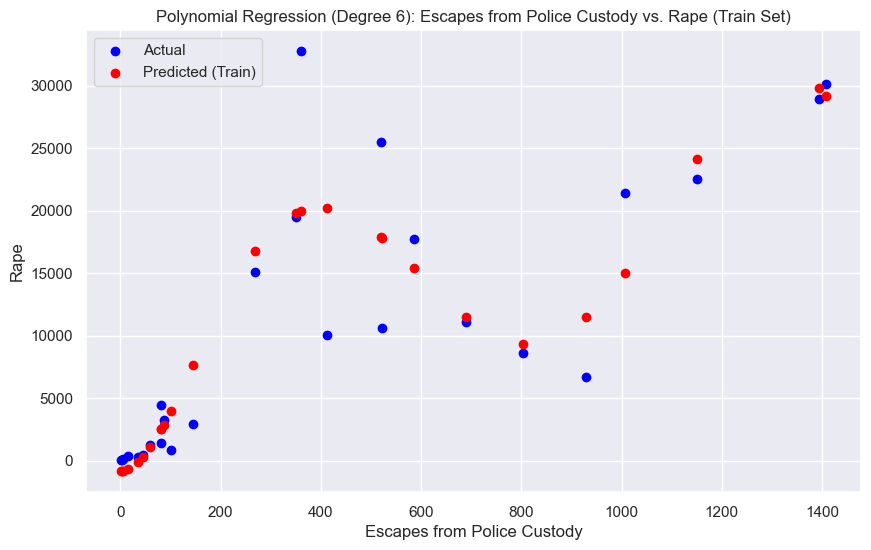

In [38]:
# Separate features (X) and target variable (y)
X = filtered_df[['EPC_Persons_Escaped_Total']]
y = filtered_df['Rape']

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Polynomial features transformation
degree = 6  # Define the degree of polynomial features
poly_features = PolynomialFeatures(degree=degree)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

# Create and fit the polynomial regression model
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

# Coefficients of the Polynomial Regression line
print('Intercept \t: = ', poly_model.intercept_)
print('Coefficients \t: = ', poly_model.coef_)

# Make predictions
y_train_pred = poly_model.predict(X_train_poly)

# Evaluate the model
mse = mean_squared_error(y_train, y_train_pred)
rmse = np.sqrt(mse)  # Calculate RMSE
r2 = poly_model.score(X_train_poly, y_train)
print(f"Mean Squared Error (Train Set): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R^2 Explained Variance (Train Set): {r2:.2f}")

# Plot the polynomial regression line
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, color='blue', label='Actual')
plt.scatter(X_train, y_train_pred, color='red', label='Predicted (Train)')
plt.title(f'Polynomial Regression (Degree {degree}): Escapes from Police Custody vs. Rape (Train Set)')
plt.xlabel('Escapes from Police Custody')
plt.ylabel('Rape')
plt.legend()
plt.grid(True)
plt.show()

#### Using degree 8 polynomial regression

Intercept 	: =  2299.7314872571915
Coefficients 	: =  [ 0.00000000e+00 -1.74334843e-07  9.62642237e-11  2.62621269e-08
  4.45764482e-06 -1.71979007e-08  2.45309744e-11 -1.52955967e-14
  3.51845737e-18]
Mean Squared Error (Train Set): 26431568.86
Root Mean Squared Error (RMSE): 5141.16
R^2 Explained Variance (Train Set): 0.76


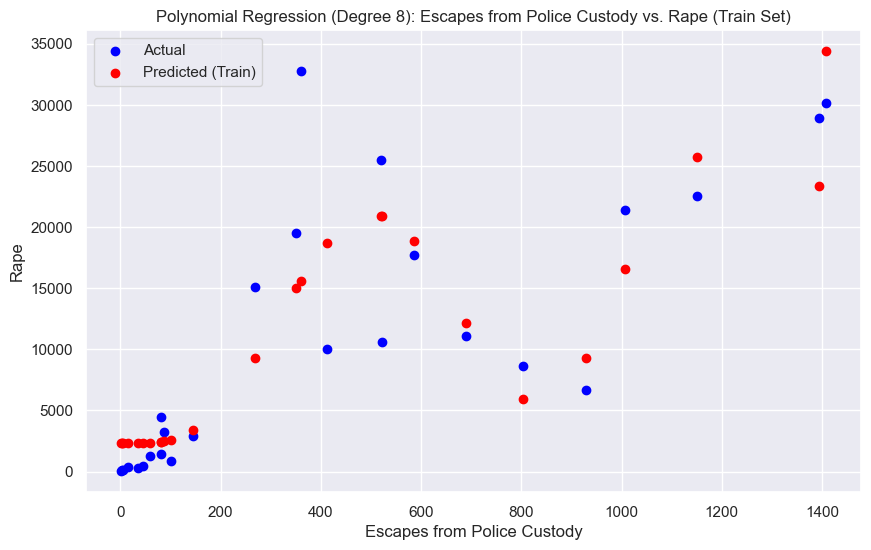

In [39]:
# Separate features (X) and target variable (y)
X = filtered_df[['EPC_Persons_Escaped_Total']]
y = filtered_df['Rape']

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Polynomial features transformation
degree = 8  # Define the degree of polynomial features
poly_features = PolynomialFeatures(degree=degree)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

# Create and fit the polynomial regression model
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

# Coefficients of the Polynomial Regression line
print('Intercept \t: = ', poly_model.intercept_)
print('Coefficients \t: = ', poly_model.coef_)

# Make predictions
y_train_pred = poly_model.predict(X_train_poly)

# Evaluate the model
mse = mean_squared_error(y_train, y_train_pred)
rmse = np.sqrt(mse)  # Calculate RMSE
r2 = poly_model.score(X_train_poly, y_train)
print(f"Mean Squared Error (Train Set): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R^2 Explained Variance (Train Set): {r2:.2f}")

# Plot the polynomial regression line
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, color='blue', label='Actual')
plt.scatter(X_train, y_train_pred, color='red', label='Predicted (Train)')
plt.title(f'Polynomial Regression (Degree {degree}): Escapes from Police Custody vs. Rape (Train Set)')
plt.xlabel('Escapes from Police Custody')
plt.ylabel('Rape')
plt.legend()
plt.grid(True)
plt.show()

#### Using degree 10 polynomial regression

Intercept 	: =  7190.046353674861
Coefficients 	: =  [ 0.00000000e+00  7.03447891e-21  2.35245292e-25  1.38692156e-26
  8.17889766e-24  4.29535220e-21  1.84131246e-18  5.02782549e-16
 -1.22821628e-18  1.01437525e-21 -2.80352662e-25]
Mean Squared Error (Train Set): 69703551.81
Root Mean Squared Error (RMSE): 8348.87
R^2 Explained Variance (Train Set): 0.38


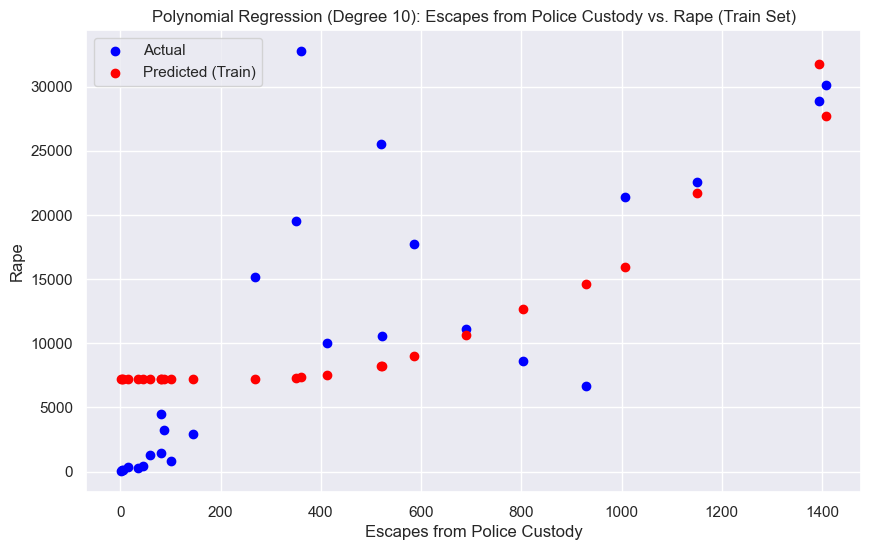

In [40]:
# Separate features (X) and target variable (y)
X = filtered_df[['EPC_Persons_Escaped_Total']]
y = filtered_df['Rape']

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Polynomial features transformation
degree = 10  # Define the degree of polynomial features
poly_features = PolynomialFeatures(degree=degree)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

# Create and fit the polynomial regression model
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

# Coefficients of the Polynomial Regression line
print('Intercept \t: = ', poly_model.intercept_)
print('Coefficients \t: = ', poly_model.coef_)

# Make predictions
y_train_pred = poly_model.predict(X_train_poly)

# Evaluate the model
mse = mean_squared_error(y_train, y_train_pred)
rmse = np.sqrt(mse)  # Calculate RMSE
r2 = poly_model.score(X_train_poly, y_train)
print(f"Mean Squared Error (Train Set): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R^2 Explained Variance (Train Set): {r2:.2f}")

# Plot the polynomial regression line
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, color='blue', label='Actual')
plt.scatter(X_train, y_train_pred, color='red', label='Predicted (Train)')
plt.title(f'Polynomial Regression (Degree {degree}): Escapes from Police Custody vs. Rape (Train Set)')
plt.xlabel('Escapes from Police Custody')
plt.ylabel('Rape')
plt.legend()
plt.grid(True)
plt.show()

We are using the dataset with outliers removed using the Z-Score method.
Values of R-Squared Explained Variance for each degree of polynomial regression:

- Degree 2: 0.59
- Degree 3: 0.75
- Degree 4: 0.75
- Degree 6: 0.83
- Degree 8: 0.76
- Degree 10: 0.38

We can thus conclude that the 6th degree polynomial regression is the best prediction model for this case, with an explained variance of 0.83.

## K-Nearest Neighbours Method (KNN)

#### Using the dataset without outliers removed:

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

Mean Squared Error: 50961307.54
Root Mean Squared Error (RMSE): 7138.72
R^2 Explained Variance: 0.73


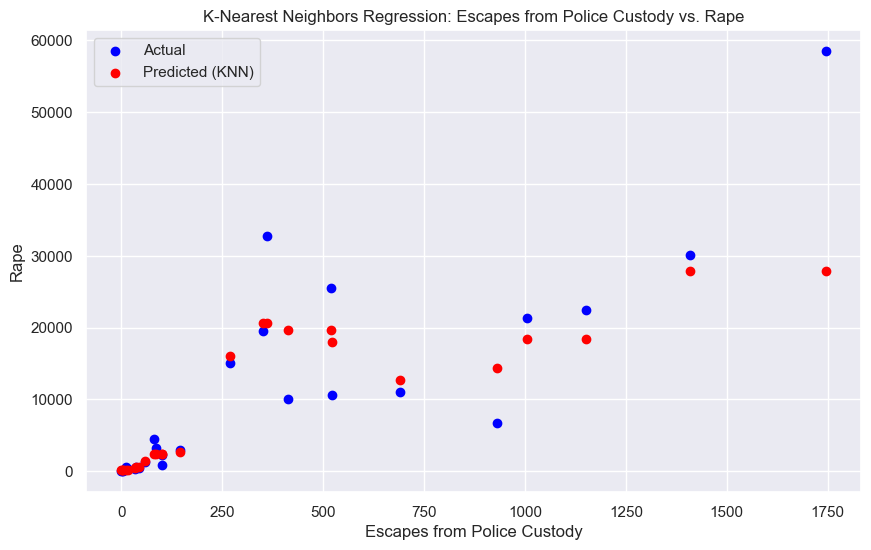

In [42]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Assuming you have already loaded and preprocessed your dataset

# Separate features (X) and target variable (y)
X = merged_df[['EPC_Persons_Escaped_Total']]
y = merged_df['Rape']

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the KNN regression model
k = 5  # Set the number of neighbors
knn_model = KNeighborsRegressor(n_neighbors=k)
knn_model.fit(X_train, y_train)

# Make predictions
y_pred = knn_model.predict(X_train)

# Evaluate the model
mse = mean_squared_error(y_train, y_pred)
rmse = np.sqrt(mse)
r2 = knn_model.score(X_train, y_train)

print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R^2 Explained Variance: {r2:.2f}")

# Plot the KNN predictions
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, color='blue', label='Actual')
plt.scatter(X_train, y_pred, color='red', label='Predicted (KNN)')
plt.title('K-Nearest Neighbors Regression: Escapes from Police Custody vs. Rape')
plt.xlabel('Escapes from Police Custody')
plt.ylabel('Rape')
plt.legend()
plt.grid(True)
plt.show()

#### Using the dataset with outliers removed via Z-Score Method:

Mean Squared Error: 24347209.92
Root Mean Squared Error (RMSE): 4934.29
R^2 Explained Variance: 0.78


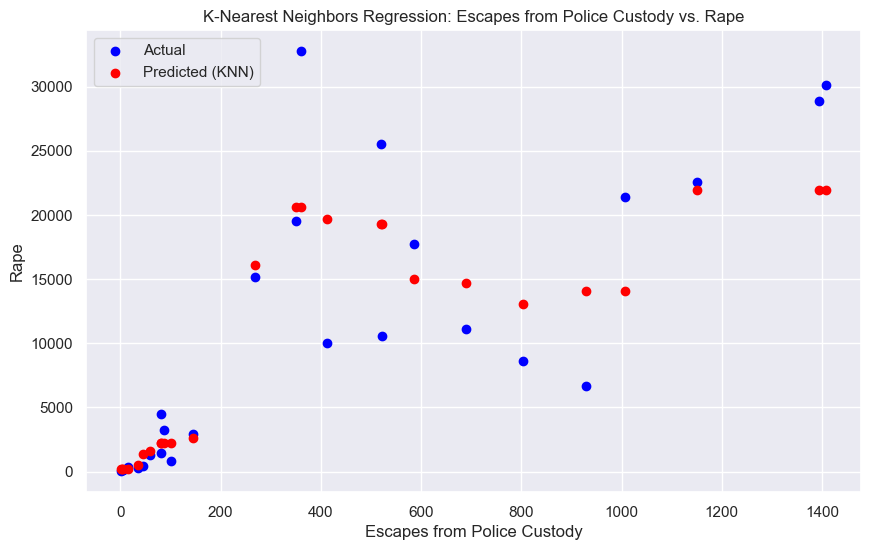

In [43]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Assuming you have already loaded and preprocessed your dataset

# Separate features (X) and target variable (y)
X = filtered_df[['EPC_Persons_Escaped_Total']]
y = filtered_df['Rape']

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the KNN regression model
k = 5  # Set the number of neighbors
knn_model = KNeighborsRegressor(n_neighbors=k)
knn_model.fit(X_train, y_train)

# Make predictions
y_pred = knn_model.predict(X_train)

# Evaluate the model
mse = mean_squared_error(y_train, y_pred)
rmse = np.sqrt(mse)
r2 = knn_model.score(X_train, y_train)

print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R^2 Explained Variance: {r2:.2f}")

# Plot the KNN predictions
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, color='blue', label='Actual')
plt.scatter(X_train, y_pred, color='red', label='Predicted (KNN)')
plt.title('K-Nearest Neighbors Regression: Escapes from Police Custody vs. Rape')
plt.xlabel('Escapes from Police Custody')
plt.ylabel('Rape')
plt.legend()
plt.grid(True)
plt.show()

Using the K-Nearest Neighbours (KNN) Method, we achieve more accurate results when we use the outliers removed dataset, which gives us an explained variance of 0.73, whilst the dataset without outliers removed gave us an explained variance of 0.78.

### Conclusion

After using 3 different machine learning methods, I have found that the polynomial regression method (6th degree) is the best predictor of our response variable, with an explained variance of 0.83, compared to other methods such as linear regression and K-Nearest Neighbours.